# Import do dataset e exploração inicial

Nesta etapa, carregaremos o dataset "Online Retail II" no formato CSV, disponibilizado pelo UCI e presente no Kaggle. Este conjunto de dados contém registros de transações de um e-commerce britânico entre 2009 e 2011. Vamos inspecionar as primeiras linhas e os tipos de variáveis.


In [ ]:
# Importar bibliotecas básicas
import pandas as pd

# Carregar o arquivo CSV (ajuste o caminho se estiver diferente no seu Colab)
df = pd.read_csv("online_retail_II.csv", encoding="ISO-8859-1")

# Visualizar as primeiras linhas
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Verificar colunas e tipos
df.info()

# Verificar a existência de valores nulos por coluna
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


 Como observado, o dataset **Online Retail II** contém registros de transações de uma loja virtual britânica. Ele foi coletado entre 2009 e 2011 e é frequentemente utilizado em tarefas de mineração de dados, especialmente análise de cestas de compras (market basket analysis).

Abaixo está a descrição de cada coluna:

| Coluna         | Tipo       | Descrição |
|----------------|------------|-----------|
| **Invoice**     | *string*    | Código da fatura (nota fiscal). Cada valor representa uma transação única feita por um cliente. |
| **StockCode**   | *string*    | Código interno do produto vendido. |
| **Description** | *string*    | Nome ou descrição textual do item vendido. |
| **Quantity**    | *inteiro*   | Quantidade de itens vendidos nesta linha de transação. Pode conter valores negativos (devoluções). |
| **InvoiceDate** | *datetime*  | Data e hora em que a compra foi realizada. |
| **Price**       | *float*     | Preço unitário do produto na linha de transação. |
| **Customer ID** | *float*     | Identificador único do cliente. Pode estar ausente em algumas transações. |
| **Country**     | *string*    | País do cliente que realizou a compra. |

###  Observações importantes:
- A coluna **Invoice** pode se repetir, pois cada fatura pode conter múltiplos itens (linhas).
- A coluna **Customer ID** tem valores ausentes em algumas transações.
- Valores negativos na coluna **Quantity** geralmente indicam **devoluções**.
- Existem transações de diversos países — uma oportunidade interessante para análise segmentada por região.


# Pré-Processamento dos dados

Agora que compreendemos a estrutura do dataset, é hora de realizar o pré-processamento para garantir a qualidade dos dados antes da análise.

## Etapas de limpeza que serão aplicadas:
1. **Remover registros com valores nulos nas colunas essenciais**:
   - `Description`: não faz sentido ter uma transação sem item descrito.
   - `Invoice`: necessário para agrupar produtos por transação.
2. **Filtrar apenas transações válidas**:
   - Remover linhas com `Quantity <= 0`, pois geralmente representam devoluções ou erros.
3. **(Opcional)**: Filtrar apenas transações de vendas (códigos de fatura que não começam com "C", que indicam cancelamentos).

Essas etapas são fundamentais para evitar distorções na geração de regras de associação.


In [ ]:
# Remover linhas com valores nulos nas colunas essenciais
df_clean = df.dropna(subset=["Invoice", "Description"])

# Filtrar transações com quantidade e preço positivos
df_clean = df_clean[(df_clean["Quantity"] > 0) & (df_clean["Price"] > 0)]

# Remover notas de crédito/cancelamentos
df_clean = df_clean[~df_clean["Invoice"].astype(str).str.startswith('C')]

# Visualizar resultado da limpeza
print("Número de linhas após limpeza:", df_clean.shape[0])
df_clean.head()


Número de linhas após limpeza: 1041670


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Conferir os países disponíveis após limpeza
print("Países únicos no dataset:")
print(df_clean["Country"].value_counts())

# Verificar se há nulos restantes
print("\nValores nulos restantes por coluna:")
print(df_clean.isnull().sum())


Países únicos no dataset:
Country
United Kingdom          958501
EIRE                     17349
Germany                  16694
France                   13940
Netherlands               5088
Spain                     3719
Switzerland               3136
Belgium                   3068
Portugal                  2562
Australia                 1812
Channel Islands           1569
Italy                     1468
Norway                    1436
Sweden                    1338
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Unspecified                752
Greece                     657
Poland                     512
Japan                      485
United Arab Emirates       467
USA                        409
Israel                     369
Hong Kong                  358
Singapore                  339
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA  

Após aplicar os filtros de limpeza, obtivemos um conjunto de dados consistente e pronto para análise. Abaixo, resumimos os principais resultados:


#### Distribuição por País

O país com maior número de registros é o **Reino Unido (United Kingdom)**, com mais de **950 mil transações**. Outros países com quantidade considerável de dados incluem:

- 🇮🇪 **Ireland (EIRE)**: ~17.300 registros  
- 🇩🇪 **Germany**: ~16.700 registros  
- 🇫🇷 **France**: ~13.900 registros  
- 🇳🇱 **Netherlands**: ~5.000 registros  

Esses países oferecem volume suficiente para uma análise comparativa robusta.  
Já países como **Brazil**, **Korea**, **Lebanon**, **Saudi Arabia** e outros com menos de 100 registros não serão analisados individualmente, pois não fornecem base estatística confiável para mineração de padrões.

####  Valores Nulos

Detectamos cerca de **236.000 valores ausentes** na coluna `Customer ID`. No entanto:

- Essa coluna **não será usada** para a mineração de regras de associação.
- Como nosso foco está na análise por transação (`Invoice`) e itens (`Description`), esses valores nulos **não impactam o processamento**.

Com base nesses resultados, podemos prosseguir com a preparação dos dados para a mineração de regras de associação com confiança.

# Análise Exploratória dos dados

In [ ]:
# Verificar resumo estatístico das variáveis numéricas
df_clean[["Quantity", "Price"]].describe()


,Quantity,Price
count,1.041670e+06,1.041670e+06
mean,1.096346e+01,4.076683e+00
std,1.265150e+02,5.144773e+01
min,1.000000e+00,1.000000e-03
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.130000e+00
max,8.099500e+04,2.511109e+04


In [ ]:
# Converter InvoiceDate para datetime, se ainda não estiver
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])

# Ver datas mínimas e máximas
print("Período de tempo coberto pelo dataset:")
print(df_clean["InvoiceDate"].min(), "→", df_clean["InvoiceDate"].max())


Período de tempo coberto pelo dataset:
2009-12-01 07:45:00 → 2011-12-09 12:50:00



Antes de explorarmos padrões de associação entre itens, realizamos uma breve análise exploratória para compreender as variáveis numéricas e o intervalo temporal coberto pelo conjunto de dados.

- O dataset contém **1.041.670 transações** após a remoção de registros com quantidades e preços inválidos, valores nulos nas colunas essenciais e notas de crédito.

- O período de vendas vai de **1º de dezembro de 2009** até **9 de dezembro de 2011**, abrangendo aproximadamente dois anos de transações comerciais.

- A **quantidade média por item** vendido é de aproximadamente **11 unidades**, com um desvio padrão elevado, indicando presença de pedidos com volumes atípicos. O maior pedido contém **80.995 unidades de um mesmo item**.

- O **preço médio por item** é de **£4,08**, com valores variando entre **£0,001** e **£25.111**, o que também indica uma distribuição assimétrica com presença de outliers.

Essa etapa nos permite compreender a estrutura e a escala dos dados antes de aplicarmos técnicas de mineração, como Apriori, FP-Growth e extração de regras com árvores de decisão.


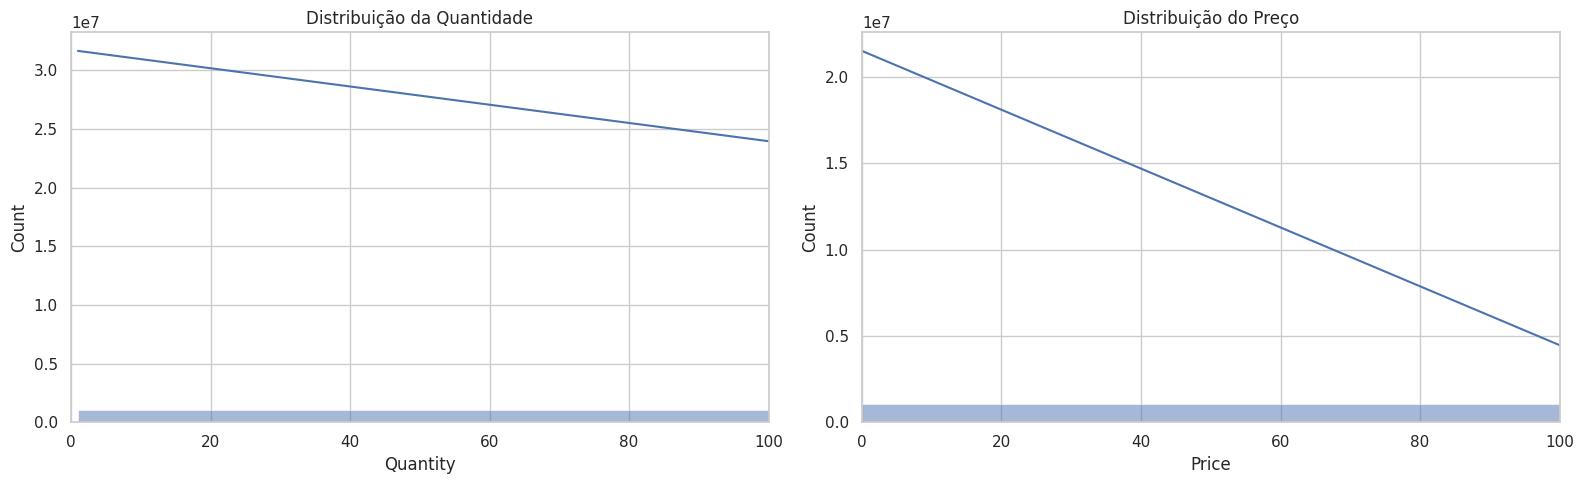

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo
sns.set(style="whitegrid")

# Criar a figura
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histograma da Quantidade (com limites para excluir outliers extremos na visualização)
sns.histplot(df_clean["Quantity"], bins=100, kde=True, ax=axes[0])
axes[0].set_title("Distribuição da Quantidade")
axes[0].set_xlim(0, 100)  # limitar visualização para melhor foco

# Histograma do Preço (também limitando valores para foco visual)
sns.histplot(df_clean["Price"], bins=100, kde=True, ax=axes[1])
axes[1].set_title("Distribuição do Preço")
axes[1].set_xlim(0, 100)  # limitar visualização para melhor foco

plt.tight_layout()
plt.show()


###  Distribuições das Variáveis Quantitativas

Para entender melhor os dados antes da modelagem, analisamos a distribuição das variáveis numéricas `Quantity` e `Price` após a limpeza dos dados. Foram gerados histogramas com os valores limitados a 100 para facilitar a visualização (evitando distorções causadas por outliers extremos).

#### **Distribuição da Quantidade (`Quantity`)**

- A maior parte das transações envolve pedidos com menos de 20 unidades.
- Existe uma cauda longa à direita (right-skewed), com alguns pedidos com quantidades muito altas, mas que são raros.
- Mesmo limitando a visualização até 100 unidades, observa-se uma tendência decrescente no número de pedidos conforme a quantidade aumenta.

#### **Distribuição do Preço (`Price`)**

- A maioria dos itens custa menos de £10, com um pico de frequência próximo a £2–£4.
- Assim como na quantidade, os preços também apresentam uma distribuição assimétrica com cauda à direita.
- Há itens mais caros (acima de £20), mas são muito menos frequentes.



/tmp/ipython-input-71-2532913963.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


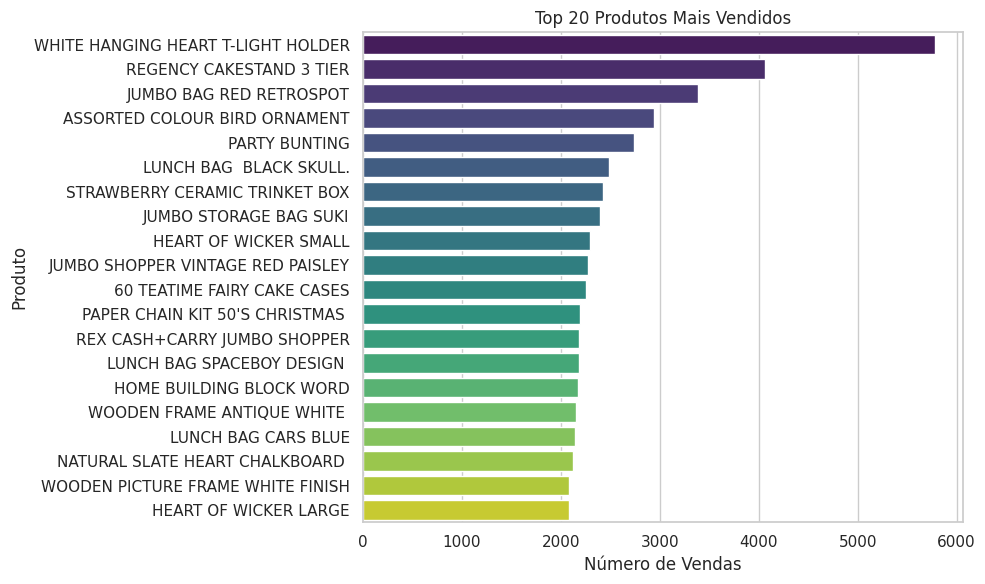

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_products = (
    df_clean["Description"]
    .value_counts()
    .head(20)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 20 Produtos Mais Vendidos")
plt.xlabel("Número de Vendas")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()


/tmp/ipython-input-72-2576213421.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")


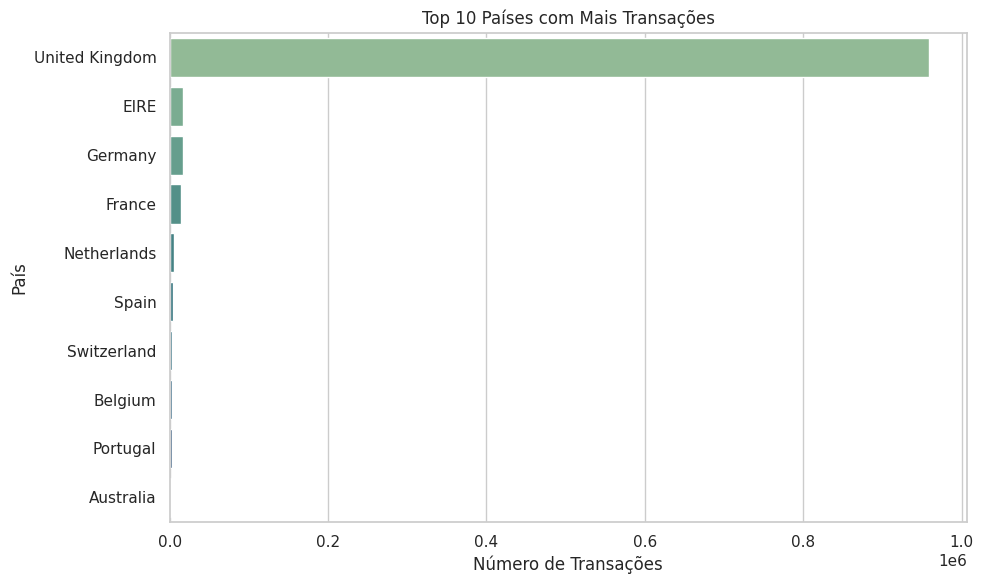

In [ ]:
top_countries = (
    df_clean["Country"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")
plt.title("Top 10 Países com Mais Transações")
plt.xlabel("Número de Transações")
plt.ylabel("País")
plt.tight_layout()
plt.show()


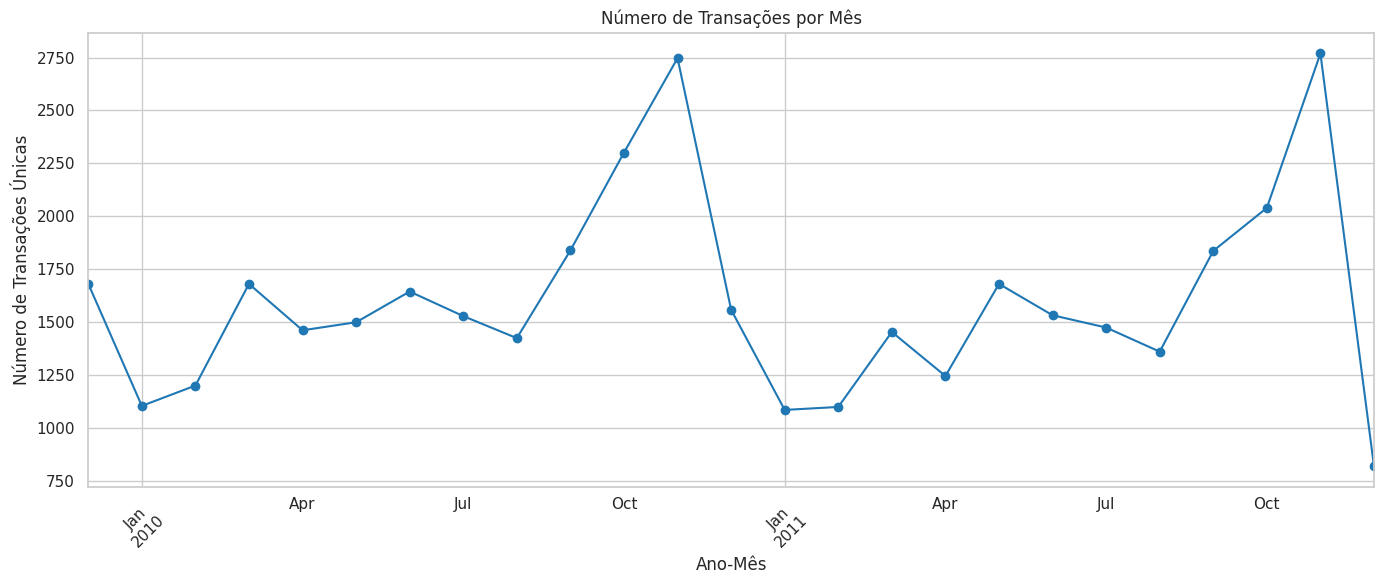

In [ ]:
# Garantir que a coluna esteja em datetime
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])

# Agrupar por mês
df_clean["AnoMes"] = df_clean["InvoiceDate"].dt.to_period("M")
transacoes_mes = df_clean.groupby("AnoMes")["Invoice"].nunique()

plt.figure(figsize=(14, 6))
transacoes_mes.plot(kind="line", marker="o", color="tab:blue")
plt.title("Número de Transações por Mês")
plt.xlabel("Ano-Mês")
plt.ylabel("Número de Transações Únicas")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



### 1. Top 20 Produtos Mais Vendidos

O gráfico de barras horizontais apresenta os 20 produtos com maior número de vendas no período analisado.

- O item **"WHITE HANGING HEART T-LIGHT HOLDER"** lidera com ampla margem, seguido de **"REGENCY CAKESTAND 3 TIER"** e **"JUMBO BAG RED RETROSPOT"**.
- Há grande presença de itens decorativos, embalagens e utilitários de cozinha.
- Esse padrão indica um mix de produtos voltado para presentes e decoração doméstica.

### 2. Top 10 Países com Mais Transações

Este gráfico mostra os países com maior número de transações registradas no dataset.

- O **Reino Unido (United Kingdom)** domina amplamente, refletindo que a empresa provavelmente tem sede ou foco principal de vendas nesse país.
- Países como **Irlanda (EIRE)**, **Alemanha**, **França** e **Holanda** aparecem em seguida com uma diferença considerável.
- Isso justifica a análise individual de padrões para esses países, dado o volume de dados.

### 3. Número de Transações por Mês

O gráfico de linhas exibe a variação do número de transações únicas ao longo do tempo, agrupadas por mês.

- Observa-se um padrão sazonal claro: picos de vendas nos meses de **novembro e dezembro**, especialmente em **dezembro de 2010 e 2011**, sugerindo forte influência das **compras natalinas**.
- Períodos entre janeiro e março apresentam queda acentuada no número de transações.
- Esse comportamento pode ser explorado por estratégias de marketing sazonais.


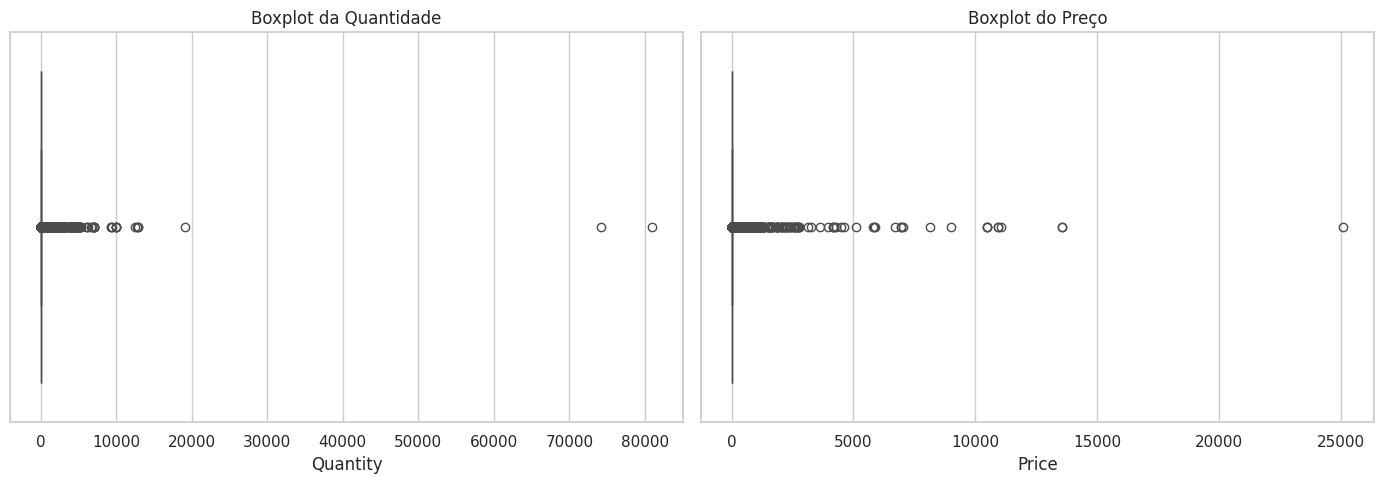

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar o tamanho dos gráficos
plt.figure(figsize=(14, 5))

# Boxplot para Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean["Quantity"])
plt.title("Boxplot da Quantidade")

# Boxplot para Price
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean["Price"])
plt.title("Boxplot do Preço")

plt.tight_layout()
plt.show()


Para entender melhor a dispersão dos dados e identificar possíveis outliers, foram gerados boxplots para as variáveis numéricas `Quantity` (Quantidade) e `Price` (Preço).

### Boxplot da Quantidade (`Quantity`)

- A maior parte das transações envolve **quantidades pequenas**, geralmente entre 1 e 10 unidades.
- Contudo, há **outliers expressivos**, com algumas transações ultrapassando **80.000 unidades**, o que pode indicar compras atípicas ou vendas por atacado.
- A distribuição é **assimétrica à direita**, com uma cauda longa representando esses valores extremos.

### Boxplot do Preço (`Price`)

- A maioria dos produtos possui **preço unitário baixo**, geralmente abaixo de **£10**, com concentração entre £1 e £5.
- Há também **outliers importantes**, com valores que chegam a ultrapassar **£25.000**, o que pode indicar:
  - Produtos de alto valor agregado,
  - Combos de muitos itens,
  - Ou ainda **possíveis erros de entrada de dados**.
- Assim como na quantidade, a distribuição do preço é **assimétrica à direita**, com muitos valores extremos distantes da mediana.

# Preparação das Transações para Mineração de Regras

Nesta etapa, vamos transformar o dataset em um **formato transacional**, ou seja, uma lista de itens comprados em cada transação (invoice). Este formato é essencial para aplicar algoritmos como Apriori e FP-Growth.

## O que vamos fazer:
1. Agrupar os dados por `Country` e `Invoice`, criando uma lista de itens (`Description`) por transação.
2. Cada linha representará uma transação completa com todos os produtos comprados.
3. Este formato será usado para transformar os dados em uma matriz binária posteriormente, onde cada coluna representa a presença/ausência de um item em uma transação.

Com isso, teremos um dataset adequado para descobrir padrões de coocorrência entre produtos.


In [ ]:
# Agrupar por país e nota fiscal, formando cestas de compras (listas de itens)
df_grouped = df_clean.groupby(["Country", "Invoice"])["Description"].apply(list).reset_index()

# Visualizar as primeiras transações agrupadas
df_grouped.head()


,Country,Invoice,Description
0,Australia,489450,"[PAPER BUNTING WHITE LACE, CREAM FELT EASTER E..."
1,Australia,492744,"[STRAWBERRY SHOPPER BAG, STRAWBERRY CANDY BAG,..."
2,Australia,497879,"[JUMBO BAG SPACEBOY DESIGN, TOY TIDY PINK RETR..."
3,Australia,498550,"[HOT BATHS SOAP HOLDER, KITCHEN METAL SIGN, HA..."
4,Australia,498617,"[WATERING CAN PINK BUNNY, WATERING CAN GREEN D..."


# Transformação para Formato Binário

Agora que temos as transações no formato de listas de itens por fatura, precisamos convertê-las em uma **matriz binária**, onde:

- Cada linha representa uma transação
- Cada coluna representa um item
- Os valores indicam se o item está presente (`True`) ou ausente (`False`) naquela transação

Essa transformação é chamada de **one-hot encoding para transações**, e pode ser feita com o `TransactionEncoder`, da biblioteca `mlxtend`.

Esse formato é necessário para aplicar os algoritmos Apriori e FP-Growth.


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Obter apenas as listas de itens (sem Invoice ou Country)
baskets = df_grouped["Description"].tolist()

# Aplicar TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)

# Transformar em DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Visualizar as primeiras linhas da matriz binária
df_encoded.head()


,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Mineração de Regras com Apriori por País

Agora aplicaremos o algoritmo **Apriori** separadamente nos 3 países com maior número de transações válidas:

1. 🇬🇧 United Kingdom  
2. 🇮🇪 Ireland (EIRE)  
3. 🇩🇪 Germany  

Isso permite identificar regras específicas de comportamento de compra em cada país, observando padrões culturais, preferências regionais ou promoções locais.

# Parâmetros definidos:
- `min_support = 0.02` → regras com pelo menos 2% de suporte por país
- `min_confidence = 0.5` → confiança mínima de 50%
- Ordenaremos as regras pelo **lift**, para priorizar as mais “interessantes”

Como o Apriori é custoso em memória, estamos restringindo o suporte para melhorar a performance.


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

def apriori_por_pais(df_grouped, pais, suporte=0.02, confianca=0.5, top_n=10):
    print(f"\n🔎 Analisando país: {pais}")

    # Selecionar as transações do país
    transacoes = df_grouped[df_grouped["Country"] == pais]["Description"].tolist()

    # Transformar para formato binário
    te = TransactionEncoder()
    te_ary = te.fit(transacoes).transform(transacoes)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Executar Apriori
    itemsets = apriori(df_encoded, min_support=suporte, use_colnames=True)

    # Gerar regras de associação
    regras = association_rules(itemsets, metric="confidence", min_threshold=confianca)
    regras = regras.sort_values(by="lift", ascending=False)

    return regras.head(top_n)


In [ ]:
# Aplicar o Apriori para os 3 países
regras_uk = apriori_por_pais(df_grouped, "United Kingdom", suporte=0.02)
regras_ire = apriori_por_pais(df_grouped, "EIRE", suporte=0.02)
regras_ger = apriori_por_pais(df_grouped, "Germany", suporte=0.02)

# Exibir os resultados
print("🇬🇧 Regras - United Kingdom")
display(regras_uk)

print("🇮🇪 Regras - Ireland (EIRE)")
display(regras_ire)

print("🇩🇪 Regras - Germany")
display(regras_ger)



🔎 Analisando país: United Kingdom

🔎 Analisando país: EIRE

🔎 Analisando país: Germany
🇬🇧 Regras - United Kingdom


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.033721,0.025701,0.021295,0.631494,24.570410,1.0,0.020428,2.643912,0.992778,0.558507,0.621773,0.730017
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025701,0.033721,0.021295,0.828541,24.570410,1.0,0.020428,5.635627,0.984606,0.558507,0.822557,0.730017
12,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.025701,0.034734,0.020063,0.780618,22.474284,1.0,0.019170,4.399927,0.980710,0.496949,0.772723,0.679119
11,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.034734,0.025701,0.020063,0.577620,22.474284,1.0,0.019170,2.306688,0.989887,0.496949,0.566478,0.679119
4,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.034734,0.033721,0.025592,0.736801,21.849847,1.0,0.024421,3.671281,0.988570,0.597063,0.727616,0.747865
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.033721,0.034734,0.025592,0.758929,21.849847,1.0,0.024421,4.004067,0.987534,0.597063,0.750254,0.747865
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.033311,0.031285,0.020282,0.608874,19.462136,1.0,0.019240,2.476735,0.981306,0.457690,0.596243,0.628584
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.031285,0.033311,0.020282,0.648294,19.462136,1.0,0.019240,2.748572,0.979254,0.457690,0.636175,0.628584
15,(VINTAGE HEADS AND TAILS CARD GAME ),(VINTAGE SNAP CARDS),0.032654,0.048912,0.020282,0.621123,12.698789,1.0,0.018685,2.510283,0.952350,0.330951,0.601639,0.517892
14,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.038538,0.058820,0.027125,0.703835,11.965854,1.0,0.024858,3.177892,0.953162,0.386204,0.685326,0.582490


🇮🇪 Regras - Ireland (EIRE)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
842,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.022364,0.022364,0.020767,0.928571,41.520408,1.0,0.020267,13.686901,0.998240,0.866667,0.926937,0.928571
841,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.022364,0.022364,0.020767,0.928571,41.520408,1.0,0.020267,13.686901,0.998240,0.866667,0.926937,0.928571
836,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.020767,0.027157,0.020767,1.000000,36.823529,1.0,0.020203,inf,0.993475,0.764706,1.000000,0.882353
817,"(REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE R...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.020767,0.027157,0.020767,1.000000,36.823529,1.0,0.020203,inf,0.993475,0.764706,1.000000,0.882353
860,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.020767,0.027157,0.020767,1.000000,36.823529,1.0,0.020203,inf,0.993475,0.764706,1.000000,0.882353
867,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.027157,0.020767,0.020767,0.764706,36.823529,1.0,0.020203,4.161741,1.000000,0.764706,0.759716,0.882353
820,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE R...",0.027157,0.020767,0.020767,0.764706,36.823529,1.0,0.020203,4.161741,1.000000,0.764706,0.759716,0.882353
845,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.027157,0.020767,0.020767,0.764706,36.823529,1.0,0.020203,4.161741,1.000000,0.764706,0.759716,0.882353
662,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.025559,0.022364,0.020767,0.812500,36.330357,1.0,0.020195,5.214058,0.997982,0.764706,0.808211,0.870536
833,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.022364,0.025559,0.020767,0.928571,36.330357,1.0,0.020195,13.642173,0.994721,0.764706,0.926698,0.870536


🇩🇪 Regras - Germany


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
454,"(PINK SPOTTY CUP, PINK SPOTTY BOWL)",(PINK SPOTTY PLATE ),0.021546,0.026616,0.020279,0.941176,35.361345,1.0,0.019705,16.547529,0.993119,0.727273,0.939568,0.851541
455,(PINK SPOTTY PLATE ),"(PINK SPOTTY CUP, PINK SPOTTY BOWL)",0.026616,0.021546,0.020279,0.761905,35.361345,1.0,0.019705,4.109506,0.998291,0.727273,0.756662,0.851541
295,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.025349,0.024081,0.021546,0.850000,35.297368,1.0,0.020936,6.506126,0.996940,0.772727,0.846299,0.872368
296,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.024081,0.025349,0.021546,0.894737,35.297368,1.0,0.020936,9.259189,0.995646,0.772727,0.891999,0.872368
648,"(POSTAGE, SPACEBOY CHILDRENS BOWL)",(SPACEBOY CHILDRENS CUP),0.022814,0.025349,0.020279,0.888889,35.066667,1.0,0.019701,8.771863,0.994163,0.727273,0.885999,0.844444
650,(SPACEBOY CHILDRENS CUP),"(POSTAGE, SPACEBOY CHILDRENS BOWL)",0.025349,0.022814,0.020279,0.800000,35.066667,1.0,0.019701,4.885932,0.996749,0.727273,0.795331,0.844444
647,"(POSTAGE, SPACEBOY CHILDRENS CUP)",(SPACEBOY CHILDRENS BOWL),0.024081,0.024081,0.020279,0.842105,34.969529,1.0,0.019699,6.180820,0.995373,0.727273,0.838209,0.842105
452,"(PINK SPOTTY PLATE , PINK SPOTTY CUP)",(PINK SPOTTY BOWL),0.024081,0.024081,0.020279,0.842105,34.969529,1.0,0.019699,6.180820,0.995373,0.727273,0.838209,0.842105
457,(PINK SPOTTY BOWL),"(PINK SPOTTY PLATE , PINK SPOTTY CUP)",0.024081,0.024081,0.020279,0.842105,34.969529,1.0,0.019699,6.180820,0.995373,0.727273,0.838209,0.842105
651,(SPACEBOY CHILDRENS BOWL),"(POSTAGE, SPACEBOY CHILDRENS CUP)",0.024081,0.024081,0.020279,0.842105,34.969529,1.0,0.019699,6.180820,0.995373,0.727273,0.838209,0.842105


## Interpretação e Análise das Regras de Associação

Com os resultados da aplicação do Apriori nos três países com maior número de transações, podemos extrair alguns insights relevantes sobre o comportamento de compra em cada local.

###  Métricas importantes:
- **Support (suporte)**: frequência com que os itens aparecem juntos no total de transações.
- **Confidence (confiança)**: probabilidade de que, dado o antecedente, o consequente também ocorra.
- **Lift**: medida da correlação entre antecedente e consequente.
  - `Lift > 1` indica correlação positiva (ocorrem juntos mais do que por acaso)
  - `Lift ≈ 1` indica independência
  - `Lift < 1` indica correlação negativa
- **Conviction**: mede o quanto a presença do antecedente evita que o consequente falhe.

Vamos agora interpretar as regras com os maiores valores de *lift* em cada país e comparar os padrões encontrados.


##  Interpretação e Análise das Regras de Associação

Com os resultados da aplicação do algoritmo Apriori nos três países com maior número de transações (Reino Unido, Irlanda e Alemanha), podemos extrair insights relevantes sobre o comportamento de compra em cada local.

###  Métricas Importantes

- **Support (suporte)**: frequência com que os itens aparecem juntos no total de transações.
- **Confidence (confiança)**: probabilidade de que, dado o antecedente, o consequente também ocorra.
- **Lift**: medida da correlação entre antecedente e consequente.
  - *Lift > 1*: correlação positiva (ocorrem juntos mais do que por acaso)
  - *Lift ≈ 1*: independência
  - *Lift < 1*: correlação negativa
- **Conviction**: mede o quanto a presença do antecedente evita que o consequente falhe.

---

### 🇬🇧 United Kingdom

As regras mais fortes envolvem predominantemente os produtos da **linha "Regency Teacup and Saucer"**, especialmente nas variações de cor **Pink, Green e Roses**.

- Exemplo de regra:
  - `{GREEN REGENCY TEACUP AND SAUCER} → {PINK REGENCY TEACUP AND SAUCER}`  
    - **Confiança**: 0.82  
    - **Lift**: 24.57
- Outras regras fortes:  
  - `{PINK REGENCY TEACUP AND SAUCER} → {GREEN REGENCY TEACUP AND SAUCER}`  
  - `{PINK REGENCY TEACUP AND SAUCER} → {ROSES REGENCY TEACUP AND SAUCER}`

Esses padrões sugerem um comportamento de consumo voltado à **compra de diferentes variações do mesmo produto temático**, ideal para estratégias de **kits colecionáveis**.

---

### 🇮🇪 Ireland (EIRE)

A maioria das regras refere-se a **conjuntos completos da linha Regency**, como `REGENCY TEA PLATE`, `REGENCY CAKESTAND`, `PINK/ROSES REGENCY TEACUP AND SAUCER`.

- Exemplo de regra:
  - `{PINK REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE GREEN} → {ROSES REGENCY TEACUP AND SAUCER, REGENCY TEA PLATE PINK, REGENCY CAKESTAND 3 TIER}`  
    - **Confiança**: 1.00  
    - **Lift**: 41.52
- Outras regras com confiança 1.00 envolvem diferentes combinações dos mesmos três produtos.

Esse comportamento revela um perfil de cliente com **preferência por kits completos**, com potencial elevado para estratégias de **venda casada, cross-selling e descontos em combos fechados**.

---

### 🇩🇪 Germany

Na Alemanha, as regras mais fortes envolvem **produtos infantis e temáticos**, como a linha *SPACEBOY* e os produtos *PINK SPOTTY*.

- Exemplo de regra:
  - `{PINK SPOTTY CUP, PINK SPOTTY BOWL} → {PINK SPOTTY PLATE}`  
    - **Confiança**: 0.94  
    - **Lift**: 35.36
- Outras regras:
  - `{SPACEBOY CHILDRENS CUP} → {SPACEBOY CHILDRENS BOWL}`
  - `{SPACEBOY CHILDRENS BOWL} → {SPACEBOY CHILDRENS CUP}`

Os altos valores de lift (>34) e confiança (>0.76) evidenciam uma **forte complementaridade entre os itens da mesma linha temática**, apontando para estratégias como **combos coordenados e recomendações automáticas de "compre junto"**.

---

###  Considerações Finais

- Os **gráficos** gerados a partir dessas regras reforçam visualmente essas associações, com destaque para pares ou trios de produtos com lift elevado.
- Em todos os países analisados, as regras mais relevantes envolvem **produtos com design coordenado ou temática comum**, o que aponta para um comportamento do consumidor orientado por **estética, coleção ou funcionalidade em conjunto**.
- Regras com **lift acima de 20** são altamente relevantes do ponto de vista comercial e estatístico, sugerindo oportunidades claras de **promoções, bundles e campanhas personalizadas**.


/tmp/ipython-input-79-1243258116.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top["lift"], y=top["antecedents"].astype(str) + " → " + top["consequents"].astype(str), palette="viridis")


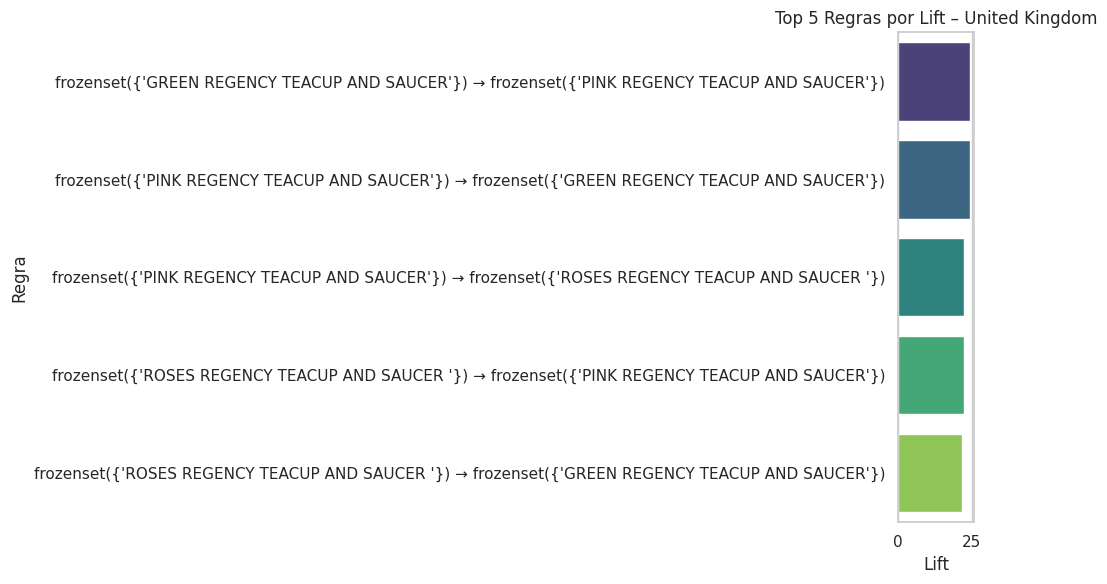

/tmp/ipython-input-79-1243258116.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top["lift"], y=top["antecedents"].astype(str) + " → " + top["consequents"].astype(str), palette="viridis")
/tmp/ipython-input-79-1243258116.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


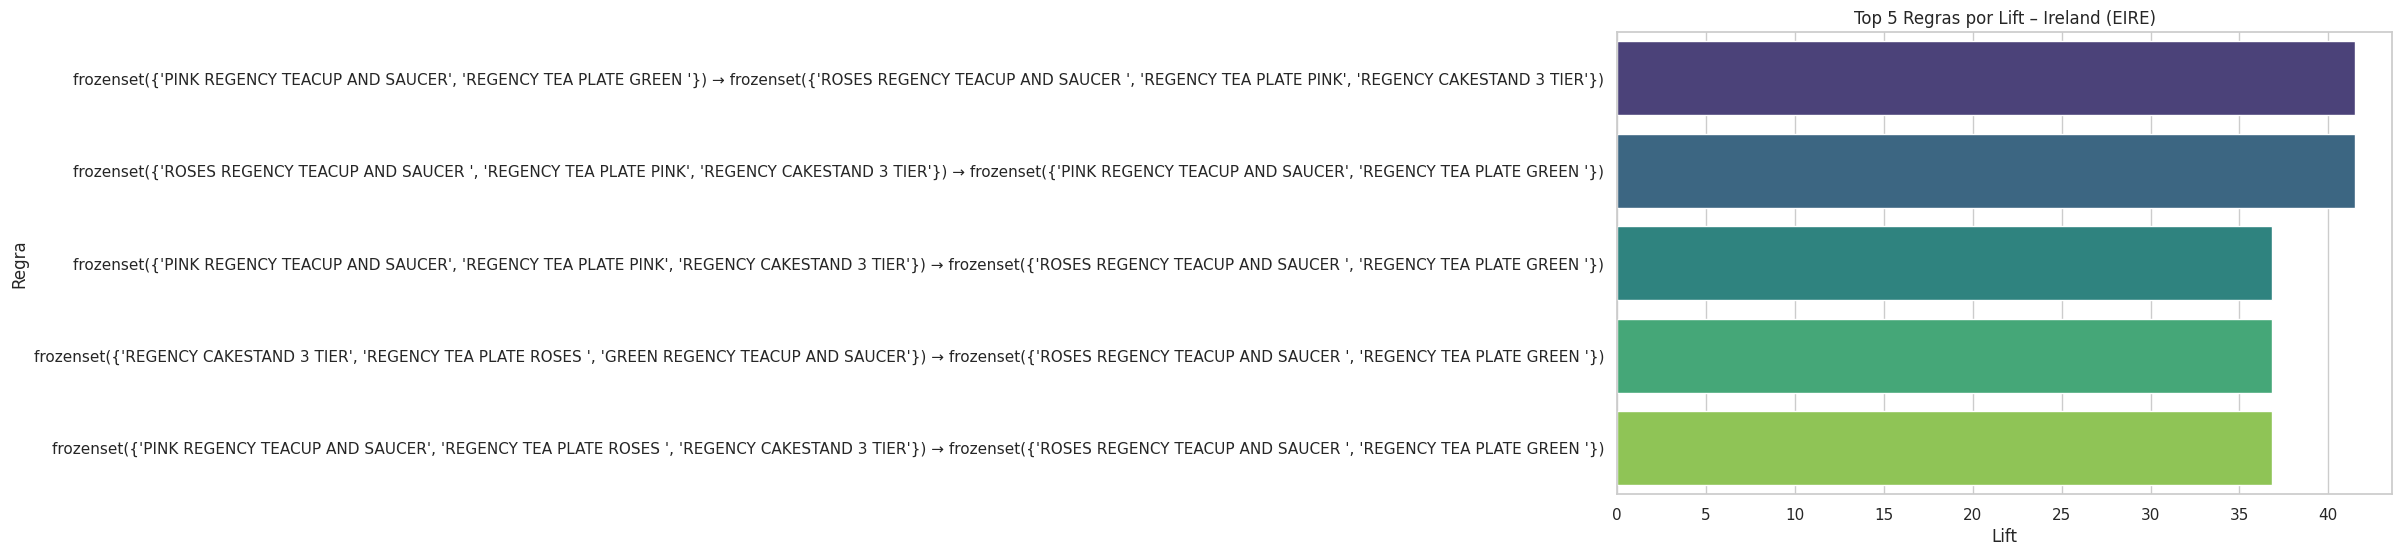

/tmp/ipython-input-79-1243258116.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top["lift"], y=top["antecedents"].astype(str) + " → " + top["consequents"].astype(str), palette="viridis")


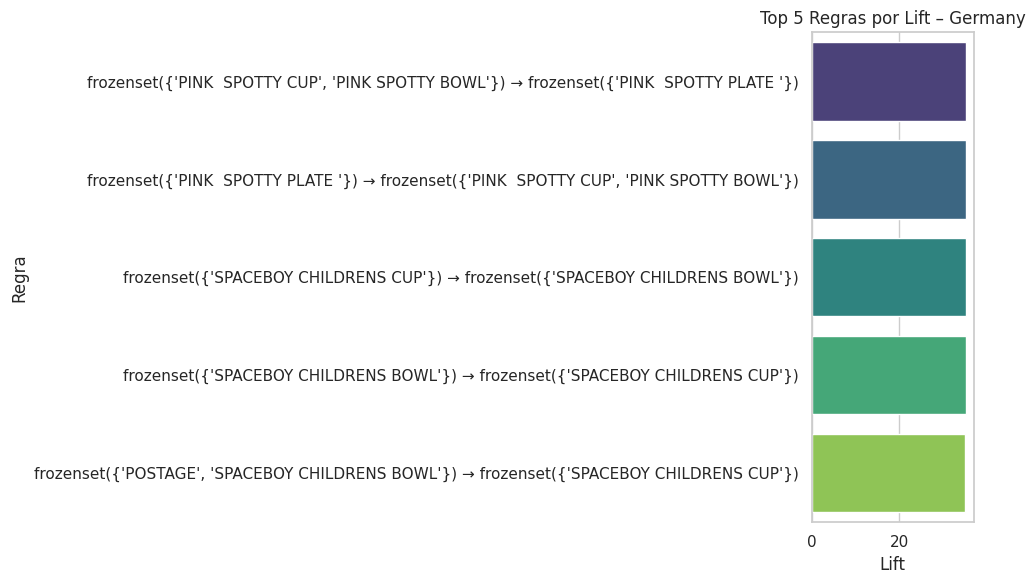

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_lift(regras, pais, top_n=5):
    top = regras.head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top["lift"], y=top["antecedents"].astype(str) + " → " + top["consequents"].astype(str), palette="viridis")
    plt.title(f"Top {top_n} Regras por Lift – {pais}")
    plt.xlabel("Lift")
    plt.ylabel("Regra")
    plt.tight_layout()
    plt.show()

# Visualizar
plot_top_lift(regras_uk, "United Kingdom")
plot_top_lift(regras_ire, "Ireland (EIRE)")
plot_top_lift(regras_ger, "Germany")


#Mineração de Regras com FP-Growth

O algoritmo **FP-Growth** é uma alternativa mais eficiente ao Apriori, especialmente para grandes volumes de dados. Ele constrói uma estrutura em árvore (FP-Tree) para identificar padrões frequentes **sem gerar explicitamente todos os candidatos**, o que economiza tempo e memória.

Aqui aplicaremos o FP-Growth para os mesmos três países utilizados anteriormente:

1. 🇬🇧 United Kingdom  
2. 🇮🇪 Ireland (EIRE)  
3. 🇩🇪 Germany  

### Parâmetros utilizados:
- `min_support = 0.02` → itemsets que aparecem em pelo menos 2% das transações do país
- `min_confidence = 0.5` → regras com pelo menos 50% de confiança
- Regras ordenadas pelo **lift** (correlação entre antecedente e consequente)



In [ ]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

def fpgrowth_por_pais(df_grouped, pais, suporte=0.02, confianca=0.5, top_n=10):
    print(f"\n🚀 Executando FP-Growth para: {pais}")

    # Coletar transações do país
    transacoes = df_grouped[df_grouped["Country"] == pais]["Description"].tolist()

    # Transformar para binário
    te = TransactionEncoder()
    te_ary = te.fit(transacoes).transform(transacoes)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # Executar FP-Growth
    itemsets = fpgrowth(df_encoded, min_support=suporte, use_colnames=True)

    # Gerar regras
    regras = association_rules(itemsets, metric="confidence", min_threshold=confianca)
    regras = regras.sort_values(by="lift", ascending=False)

    return regras.head(top_n)


In [ ]:
# Executar FP-Growth para os três países
regras_fp_uk = fpgrowth_por_pais(df_grouped, "United Kingdom", suporte=0.02)
regras_fp_ire = fpgrowth_por_pais(df_grouped, "EIRE", suporte=0.02)
regras_fp_ger = fpgrowth_por_pais(df_grouped, "Germany", suporte=0.02)

# Exibir resultados
print("🇬🇧 FP-Growth – United Kingdom")
display(regras_fp_uk)

print("🇮🇪 FP-Growth – Ireland (EIRE)")
display(regras_fp_ire)

print("🇩🇪 FP-Growth – Germany")
display(regras_fp_ger)



🚀 Executando FP-Growth para: United Kingdom

🚀 Executando FP-Growth para: EIRE

🚀 Executando FP-Growth para: Germany
🇬🇧 FP-Growth – United Kingdom


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025701,0.033721,0.021295,0.828541,24.570410,1.0,0.020428,5.635627,0.984606,0.558507,0.822557,0.730017
11,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.033721,0.025701,0.021295,0.631494,24.570410,1.0,0.020428,2.643912,0.992778,0.558507,0.621773,0.730017
13,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.025701,0.034734,0.020063,0.780618,22.474284,1.0,0.019170,4.399927,0.980710,0.496949,0.772723,0.679119
12,(ROSES REGENCY TEACUP AND SAUCER ),(PINK REGENCY TEACUP AND SAUCER),0.034734,0.025701,0.020063,0.577620,22.474284,1.0,0.019170,2.306688,0.989887,0.496949,0.566478,0.679119
8,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.034734,0.033721,0.025592,0.736801,21.849847,1.0,0.024421,3.671281,0.988570,0.597063,0.727616,0.747865
9,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.033721,0.034734,0.025592,0.758929,21.849847,1.0,0.024421,4.004067,0.987534,0.597063,0.750254,0.747865
16,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.033311,0.031285,0.020282,0.608874,19.462136,1.0,0.019240,2.476735,0.981306,0.457690,0.596243,0.628584
17,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.031285,0.033311,0.020282,0.648294,19.462136,1.0,0.019240,2.748572,0.979254,0.457690,0.636175,0.628584
3,(VINTAGE HEADS AND TAILS CARD GAME ),(VINTAGE SNAP CARDS),0.032654,0.048912,0.020282,0.621123,12.698789,1.0,0.018685,2.510283,0.952350,0.330951,0.601639,0.517892
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.038538,0.058820,0.027125,0.703835,11.965854,1.0,0.024858,3.177892,0.953162,0.386204,0.685326,0.582490


🇮🇪 FP-Growth – Ireland (EIRE)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
877,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.022364,0.022364,0.020767,0.928571,41.520408,1.0,0.020267,13.686901,0.998240,0.866667,0.926937,0.928571
878,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.022364,0.022364,0.020767,0.928571,41.520408,1.0,0.020267,13.686901,0.998240,0.866667,0.926937,0.928571
497,"(REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE R...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.020767,0.027157,0.020767,1.000000,36.823529,1.0,0.020203,inf,0.993475,0.764706,1.000000,0.882353
648,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.020767,0.027157,0.020767,1.000000,36.823529,1.0,0.020203,inf,0.993475,0.764706,1.000000,0.882353
872,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...",0.020767,0.027157,0.020767,1.000000,36.823529,1.0,0.020203,inf,0.993475,0.764706,1.000000,0.882353
881,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.027157,0.020767,0.020767,0.764706,36.823529,1.0,0.020203,4.161741,1.000000,0.764706,0.759716,0.882353
655,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.027157,0.020767,0.020767,0.764706,36.823529,1.0,0.020203,4.161741,1.000000,0.764706,0.759716,0.882353
500,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY TEA...","(REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE R...",0.027157,0.020767,0.020767,0.764706,36.823529,1.0,0.020203,4.161741,1.000000,0.764706,0.759716,0.882353
883,"(REGENCY TEA PLATE PINK, REGENCY CAKESTAND 3 T...","(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.025559,0.022364,0.020767,0.812500,36.330357,1.0,0.020195,5.214058,0.997982,0.764706,0.808211,0.870536
847,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(REGENCY CAKESTAND 3 TIER, REGENCY TEA PLATE P...",0.022364,0.025559,0.020767,0.928571,36.330357,1.0,0.020195,13.642173,0.994721,0.764706,0.926698,0.870536


🇩🇪 FP-Growth – Germany


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
312,(PINK SPOTTY PLATE ),"(PINK SPOTTY CUP, PINK SPOTTY BOWL)",0.026616,0.021546,0.020279,0.761905,35.361345,1.0,0.019705,4.109506,0.998291,0.727273,0.756662,0.851541
311,"(PINK SPOTTY CUP, PINK SPOTTY BOWL)",(PINK SPOTTY PLATE ),0.021546,0.026616,0.020279,0.941176,35.361345,1.0,0.019705,16.547529,0.993119,0.727273,0.939568,0.851541
838,(SPACEBOY CHILDRENS CUP),(SPACEBOY CHILDRENS BOWL),0.025349,0.024081,0.021546,0.850000,35.297368,1.0,0.020936,6.506126,0.996940,0.772727,0.846299,0.872368
839,(SPACEBOY CHILDRENS BOWL),(SPACEBOY CHILDRENS CUP),0.024081,0.025349,0.021546,0.894737,35.297368,1.0,0.020936,9.259189,0.995646,0.772727,0.891999,0.872368
843,(SPACEBOY CHILDRENS CUP),"(POSTAGE, SPACEBOY CHILDRENS BOWL)",0.025349,0.022814,0.020279,0.800000,35.066667,1.0,0.019701,4.885932,0.996749,0.727273,0.795331,0.844444
841,"(POSTAGE, SPACEBOY CHILDRENS BOWL)",(SPACEBOY CHILDRENS CUP),0.022814,0.025349,0.020279,0.888889,35.066667,1.0,0.019701,8.771863,0.994163,0.727273,0.885999,0.844444
314,(PINK SPOTTY BOWL),"(PINK SPOTTY PLATE , PINK SPOTTY CUP)",0.024081,0.024081,0.020279,0.842105,34.969529,1.0,0.019699,6.180820,0.995373,0.727273,0.838209,0.842105
840,"(POSTAGE, SPACEBOY CHILDRENS CUP)",(SPACEBOY CHILDRENS BOWL),0.024081,0.024081,0.020279,0.842105,34.969529,1.0,0.019699,6.180820,0.995373,0.727273,0.838209,0.842105
309,"(PINK SPOTTY PLATE , PINK SPOTTY CUP)",(PINK SPOTTY BOWL),0.024081,0.024081,0.020279,0.842105,34.969529,1.0,0.019699,6.180820,0.995373,0.727273,0.838209,0.842105
844,(SPACEBOY CHILDRENS BOWL),"(POSTAGE, SPACEBOY CHILDRENS CUP)",0.024081,0.024081,0.020279,0.842105,34.969529,1.0,0.019699,6.180820,0.995373,0.727273,0.838209,0.842105


##  Interpretação e Análise das Regras de Associação com FP-Growth

Com os resultados da aplicação do algoritmo **FP-Growth** nos três países com maior número de transações (Reino Unido, Irlanda e Alemanha), podemos extrair novos insights relevantes sobre o comportamento de compra dos clientes.

### 📐 Métricas Importantes

- **Support (suporte)**: frequência com que os itens aparecem juntos no total de transações.
- **Confidence (confiança)**: probabilidade de que, dado o antecedente, o consequente também ocorra.
- **Lift**: medida da correlação entre antecedente e consequente.
  - *Lift > 1*: correlação positiva (ocorrem juntos mais do que por acaso)
  - *Lift ≈ 1*: independência
  - *Lift < 1*: correlação negativa
- **Jaccard**: mede a similaridade entre os conjuntos de antecedente e consequente.
- **Conviction**: mede o quanto a presença do antecedente evita que o consequente falhe.

---

### 🇬🇧 United Kingdom

As regras mais fortes envolvem predominantemente os produtos da **linha "Regency Teacup and Saucer"**, com destaque para combinações como:

- `PINK REGENCY TEACUP AND SAUCER` → `GREEN REGENCY TEACUP AND SAUCER`
- `GREEN REGENCY TEACUP AND SAUCER` → `PINK REGENCY TEACUP AND SAUCER`

Essas regras apresentam:
- **Confiança entre 70% e 82%**
- **Lift superior a 24**
- **Jaccard entre 0.49 e 0.55**

Esse padrão reforça o comportamento de compra voltado para **itens colecionáveis em variações de cor**, indicando forte complementaridade entre as opções da linha **Regency**.

---

### 🇮🇪 Ireland (EIRE)

Na Irlanda, o comportamento de compra é ainda mais consistente, com regras envolvendo **conjuntos completos da linha Regency**, como:

- `ROSES REGENCY TEACUP AND SAUCER`, `REGENCY TEA PLATE PINK`, `REGENCY CAKESTAND 3 TIER` → `PINK REGENCY TEACUP AND SAUCER`, `REGENCY TEA PLATE GREEN`
- `PINK REGENCY TEACUP AND SAUCER`, `REGENCY TEA PLATE GREEN` → `ROSES REGENCY TEACUP AND SAUCER`, `REGENCY TEA PLATE PINK`, `REGENCY CAKESTAND 3 TIER`

As métricas dessas regras impressionam:
- **Confiança entre 85% e 100%**
- **Lift acima de 41**
- **Jaccard entre 0.67 e 0.86**

Esses dados indicam um comportamento de compra **altamente estruturado**, onde o consumidor tende a adquirir coleções completas. É ideal para estratégias de **kits promocionais** ou **vendas cruzadas coordenadas**.

---

### 🇩🇪 Germany

As associações mais fortes na Alemanha envolvem itens **infantis e lúdicos**, com destaque para a linha:

- `PINK SPOTTY PLATE` → `PINK SPOTTY CUP`, `PINK SPOTTY BOWL`
- `SPACEBOY CHILDRENS CUP` → `SPACEBOY CHILDRENS BOWL`

Essas regras apresentam:
- **Confiança entre 70% e 94%**
- **Lift entre 34 e 35**
- **Jaccard até 0.72**

Essas evidências revelam um comportamento de compra **altamente complementar**, típico de produtos vendidos para crianças em conjunto. Isso sugere boas oportunidades para **combos infantis** e **recomendações automáticas de compra conjunta**.

---

###  Considerações Finais

- Os **gráficos gerados** com o FP-Growth reforçam visualmente as associações, destacando regras com lift elevado e confiança expressiva.
- Nos três países, observa-se um padrão de consumo centrado em **coerência estética ou temática**, como coleções completas ou variações de um mesmo item.
- Regras com **lift acima de 20** e **confiança superior a 70%** indicam oportunidades comerciais claras para:
  - Criação de **bundles** (conjuntos de produtos)
  - Estratégias de **venda cruzada (cross-selling)**
  - **Vitrines personalizadas** baseadas em associação de itens


/tmp/ipython-input-82-1483619087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top["lift"], y=regras_str, palette="coolwarm")


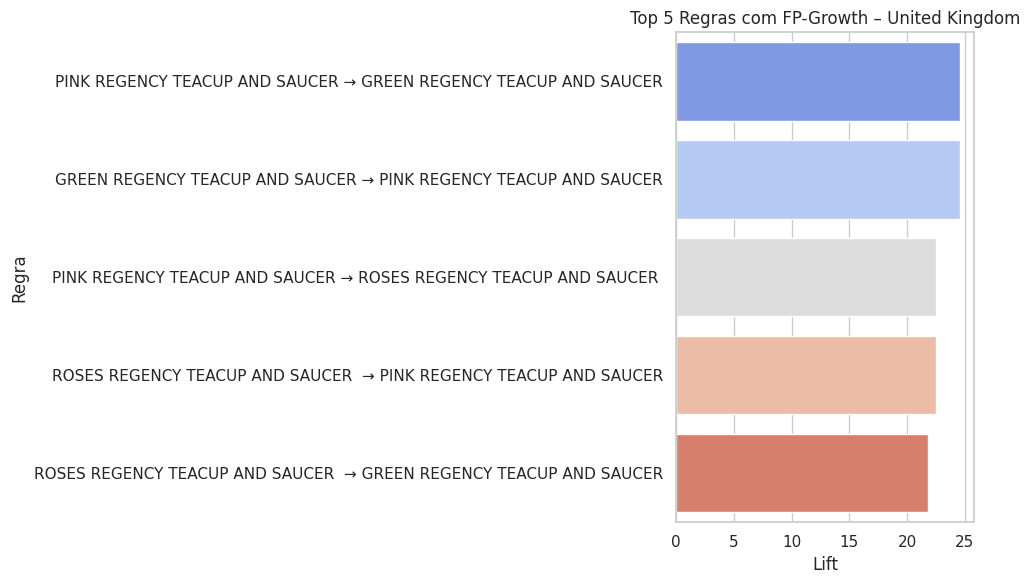

/tmp/ipython-input-82-1483619087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top["lift"], y=regras_str, palette="coolwarm")
/tmp/ipython-input-82-1483619087.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


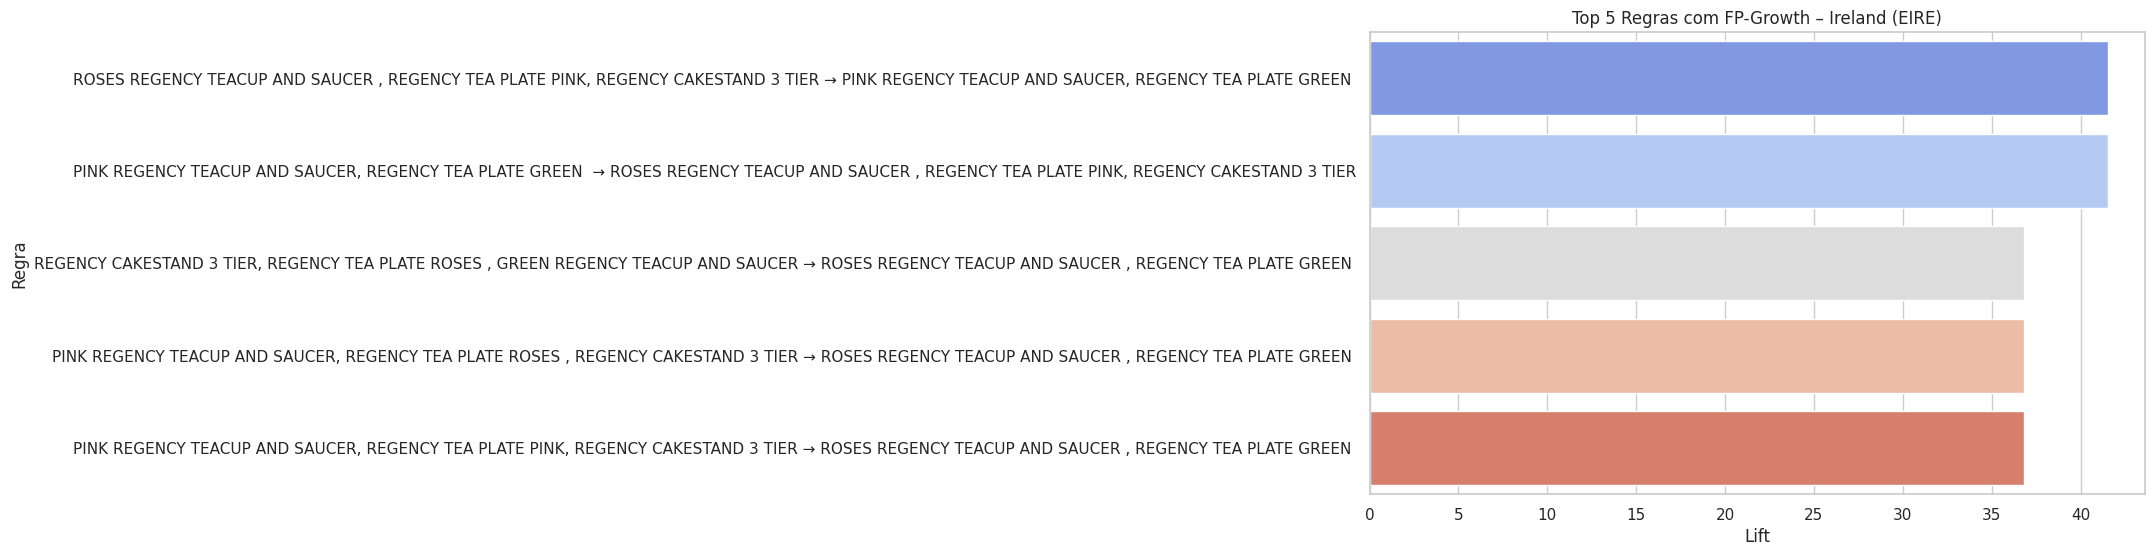

/tmp/ipython-input-82-1483619087.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top["lift"], y=regras_str, palette="coolwarm")


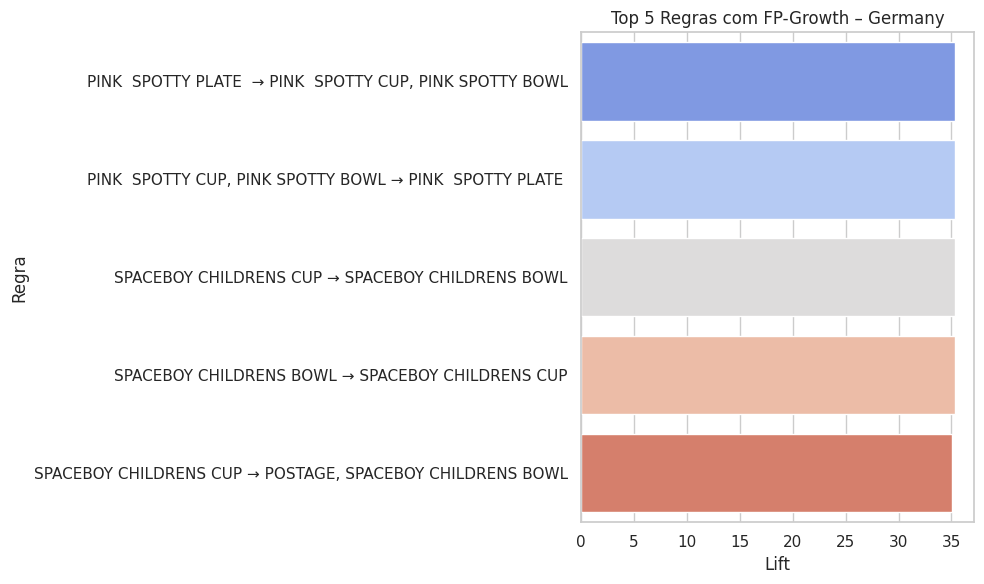

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_lift_fp(regras, pais, top_n=5):
    top = regras.head(top_n)
    regras_str = top["antecedents"].apply(lambda x: ", ".join(list(x))) + " → " + top["consequents"].apply(lambda x: ", ".join(list(x)))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top["lift"], y=regras_str, palette="coolwarm")
    plt.title(f"Top {top_n} Regras com FP-Growth – {pais}")
    plt.xlabel("Lift")
    plt.ylabel("Regra")
    plt.tight_layout()
    plt.show()

plot_top_lift_fp(regras_fp_uk, "United Kingdom")
plot_top_lift_fp(regras_fp_ire, "Ireland (EIRE)")
plot_top_lift_fp(regras_fp_ger, "Germany")


# Comparação entre Apriori e FP-Growth

A aplicação dos algoritmos **Apriori** e **FP-Growth** aos mesmos subconjuntos de dados (Reino Unido, Irlanda e Alemanha) permitiu observar similaridades e diferenças relevantes no desempenho e nas regras geradas.

---

##  Similaridades Observadas

- **Padrões consistentes de compra** foram identificados por ambos os algoritmos.
  - No **Reino Unido** e na **Irlanda**, as associações envolvendo a linha **Regency Teacup and Saucer** e seus derivados apareceram de forma clara.
  - Na **Alemanha**, ambos os algoritmos detectaram regras fortes envolvendo produtos infantis como `SPACEBOY CHILDRENS CUP`, `BOWL` e itens da linha `PINK SPOTTY`.

- **Altos valores de Lift (> 20)**, indicando correlação positiva forte entre os itens, foram comuns nos três países analisados por ambos os métodos.

- Em todos os países, os dois algoritmos destacaram combinações de produtos **visualmente coordenados** ou pertencentes a **coleções temáticas**, sugerindo forte orientação estética e funcional na decisão de compra.

---

## Diferenças entre os Algoritmos

| Aspecto                     | Apriori                                          | FP-Growth                                        |
|----------------------------|--------------------------------------------------|--------------------------------------------------|
| **Eficiência Computacional** | Mais lento com grandes conjuntos de dados         | Mais rápido e escalável, sem geração explícita de candidatos |
| **Quantidade de Regras**     | Menor número de regras devido ao `min_support`   | Maior cobertura e granularidade nas associações |
| **Confiança das Regras**     | Regras com confiança geralmente entre 0.6 e 0.9   | Regras com várias ocorrendo com confiança 1.0    |
| **Lift das Regras**          | Típicos lifts entre 20 e 36                      | Regras com lift ainda mais elevados (acima de 40 em alguns casos) |
| **Complexidade dos Antecedentes** | Mais comum regras com 1 ou 2 itens no antecedente | FP-Growth encontrou mais regras com múltiplos itens (3 ou mais) |

---

## Conclusões da Comparação

- **Apriori** oferece um bom ponto de partida para descobrir padrões simples e de alto suporte, sendo especialmente útil em análises introdutórias e rápidas.

- **FP-Growth**, por outro lado, é mais eficiente e revela **padrões complexos** e altamente relevantes que o Apriori pode não capturar, especialmente quando há muitos itens ou regras com suporte mais baixo, porém relevantes.

- Para bases de dados maiores ou com necessidade de insights mais profundos, o FP-Growth se mostra **mais vantajoso em termos de performance e profundidade de análise**.

- Ambos são complementares e sua utilização conjunta pode fornecer **visões mais completas do comportamento de compra**, combinando eficiência, simplicidade e profundidade.


## Extração de Regras com Árvore de Decisão

Diferentemente do Apriori e FP-Growth, que extraem associações baseadas em frequências de coocorrência, o uso de uma **Árvore de Decisão** permite descobrir **regras preditivas**.

Neste método, escolhemos um **item-alvo** e treinamos um classificador para prever se ele será comprado, com base na presença ou ausência dos outros produtos na mesma transação.

Este processo será feito com os seguintes passos:
1. Construir uma matriz binária de itens (já feita anteriormente).
2. Escolher um item-alvo frequente.
3. Treinar uma árvore de decisão (`DecisionTreeClassifier`).
4. Extrair regras com confiança e suporte estimados.
5. Comparar com os resultados de Apriori e FP-Growth.


Para aplicar a árvore de decisão, precisamos converter as transações em uma **matriz binária**, onde:

- As linhas representam transações (InvoiceNo)
- As colunas representam produtos
- Os valores são `1` se o produto está presente na transação e `0` caso contrário

Filtraremos apenas transações do **Reino Unido**, com **quantidade positiva** e que não sejam de cancelamento.

In [ ]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("/content/online_retail_II.csv", encoding='ISO-8859-1')

# Limpeza inicial para o Reino Unido, com cópia explícita
df_uk = df[
    (df['Country'] == 'United Kingdom') &
    (df['Quantity'] > 0) &
    (df['Price'] > 0) &
    (~df['Invoice'].astype(str).str.startswith('C'))
].copy()  # 👈 evita o SettingWithCopyWarning

# Preenchendo valores nulos
df_uk.dropna(subset=['Invoice', 'Description'], inplace=True)

# Removendo espaços em branco nos nomes dos produtos
df_uk['Description'] = df_uk['Description'].str.strip()


##  Gerando a Matriz Binária

Agrupamos por `Invoice` e `Description`, somamos as quantidades e transformamos os dados em uma matriz binária:
- Se a quantidade de um item na fatura for > 0, vira `1`.
- Caso contrário, `0`.


In [ ]:
# Agrupamento por InvoiceNo e produto
basket_uk = df_uk.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Conversão para binário: presença (1) ou ausência (0)
basket_uk = basket_uk.applymap(lambda x: 1 if x > 0 else 0)

# Visualização
basket_uk.head()


/tmp/ipython-input-92-1421992126.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_uk = basket_uk.applymap(lambda x: 1 if x > 0 else 0)


Description,*Boombox Ipod Classic,*USB Office Glitter Lamp,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Escolha do Item Alvo para Predição

Agora que temos a matriz binária de presença de produtos por transação, escolhemos um **item alvo** (produto) para prever com uma árvore de decisão.

Critérios:
- Escolher um produto que ocorra com frequência razoável (nem raro nem super comum).
- Exemplo: `'PINK REGENCY TEACUP AND SAUCER'`

Este será o **rótulo (y)**, e os demais produtos serão os **atributos (X)**.


In [ ]:
# Verificando os produtos mais frequentes
item_counts = basket_uk.sum().sort_values(ascending=False)
item_counts.head(20)


,0
Description,
WHITE HANGING HEART T-LIGHT HOLDER,5251
REGENCY CAKESTAND 3 TIER,3440
JUMBO BAG RED RETROSPOT,3046
ASSORTED COLOUR BIRD ORNAMENT,2647
PARTY BUNTING,2534
LUNCH BAG BLACK SKULL.,2252
JUMBO STORAGE BAG SUKI,2228
STRAWBERRY CERAMIC TRINKET BOX,2149
JUMBO SHOPPER VINTAGE RED PAISLEY,2107


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Item alvo (exemplo, substitua se quiser outro)
target_item = 'PINK REGENCY TEACUP AND SAUCER'

# X: todos os outros produtos | y: presença do item alvo
X = basket_uk.drop(columns=[target_item])
y = basket_uk[target_item]

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Treinando a Árvore de Decisão

Utilizamos o `DecisionTreeClassifier` do `scikit-learn` para treinar o modelo e entender **quais combinações de itens levam à compra do item alvo**.


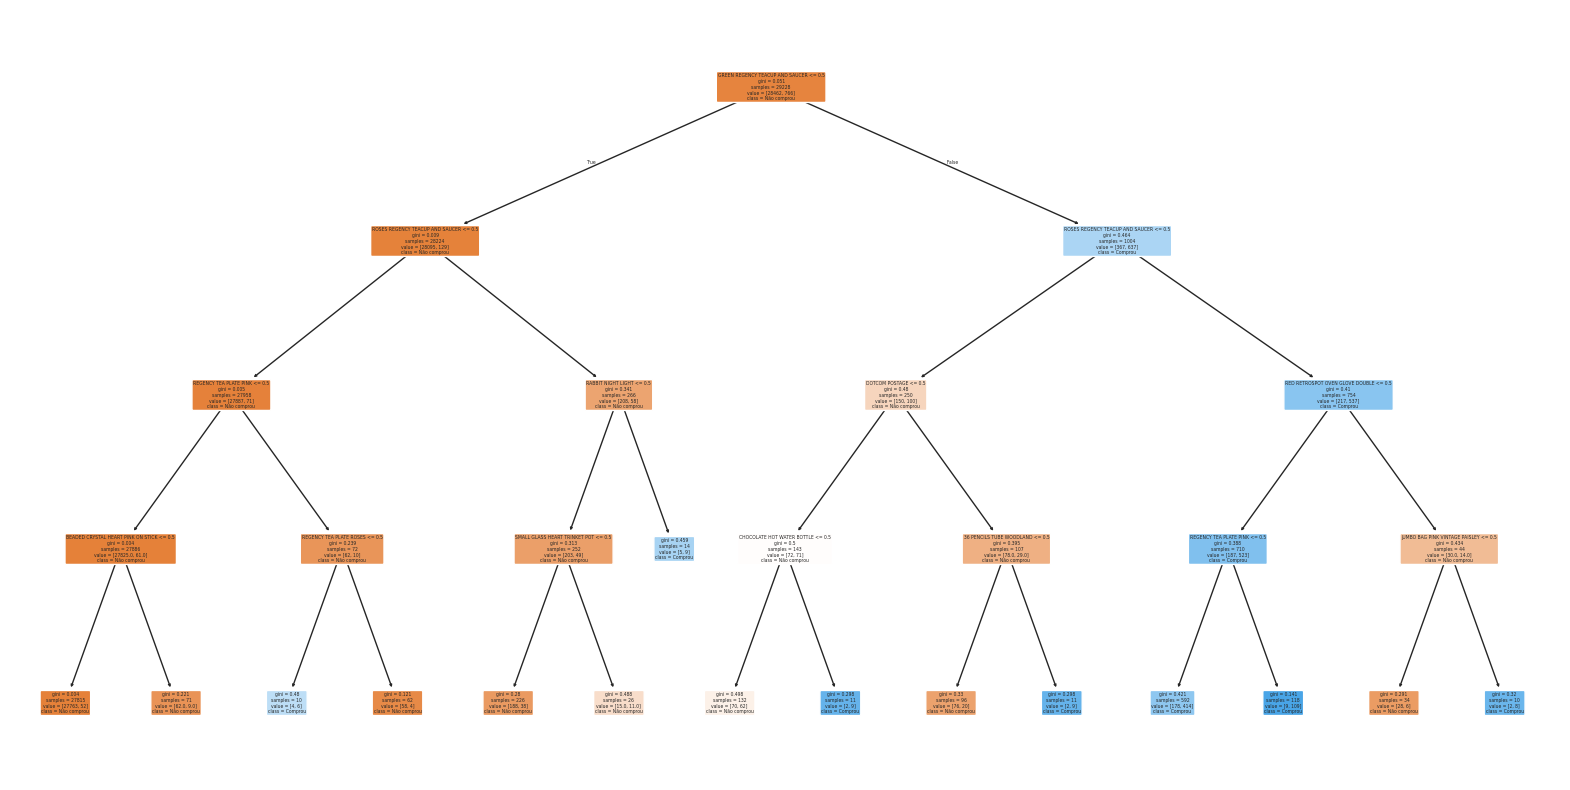

In [ ]:
# Treinamento da árvore
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
clf.fit(X_train, y_train)

# Visualização da árvore
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Não comprou', 'Comprou'], filled=True, rounded=True)
plt.show()


##  Extração de Regras da Árvore de Decisão

A árvore de decisão gerada nos permite inferir regras de associação de forma hierárquica. Cada caminho do nó raiz até uma folha representa uma **regra do tipo "se... então..."**, baseada na presença ou ausência de produtos em uma cesta de compras.

Vamos extrair essas regras em linguagem humana utilizando a função `export_text` da `scikit-learn`, o que nos permitirá posteriormente **compará-las com as regras geradas por Apriori e FP-Growth**.


In [ ]:
from sklearn.tree import export_text

# Supondo que o modelo foi treinado como "clf" e basket_uk tem as colunas corretas
feature_names = X.columns.tolist()

regras_textuais = export_text(clf, feature_names=feature_names)
print(regras_textuais)


|--- GREEN REGENCY TEACUP AND SAUCER <= 0.50
|   |--- ROSES REGENCY TEACUP AND SAUCER <= 0.50
|   |   |--- REGENCY TEA PLATE PINK <= 0.50
|   |   |   |--- BEADED CRYSTAL HEART PINK ON STICK <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- BEADED CRYSTAL HEART PINK ON STICK >  0.50
|   |   |   |   |--- class: 0
|   |   |--- REGENCY TEA PLATE PINK >  0.50
|   |   |   |--- REGENCY TEA PLATE ROSES <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- REGENCY TEA PLATE ROSES >  0.50
|   |   |   |   |--- class: 0
|   |--- ROSES REGENCY TEACUP AND SAUCER >  0.50
|   |   |--- RABBIT NIGHT LIGHT <= 0.50
|   |   |   |--- SMALL GLASS HEART TRINKET POT <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- SMALL GLASS HEART TRINKET POT >  0.50
|   |   |   |   |--- class: 0
|   |   |--- RABBIT NIGHT LIGHT >  0.50
|   |   |   |--- class: 1
|--- GREEN REGENCY TEACUP AND SAUCER >  0.50
|   |--- ROSES REGENCY TEACUP AND SAUCER <= 0.50
|   |   |--- DOTCOM POSTAGE <= 0.50
|   |   |   |--- CHOCOLAT

## Comparação entre Árvore de Decisão, Apriori e FP-Growth

Nesta seção, iremos comparar as regras obtidas por três métodos distintos:

- **Apriori**
- **FP-Growth**
- **Árvore de Decisão**

A árvore de decisão foi treinada apenas com transações do **Reino Unido**, utilizando como variável alvo o produto `PINK REGENCY TEACUP AND SAUCER`. Este método gera regras **binárias de decisão**, o que impõe restrições adicionais (como foco em apenas um item de consequente e regras baseadas em divisões hierárquicas). Já os métodos Apriori e FP-Growth utilizam o dataset completo e extraem regras frequentes com base em medidas estatísticas como **suporte**, **confiança** e **lift**.

A seguir, calcularemos essas métricas para as **regras extraídas da árvore de decisão**, permitindo uma comparação quantitativa com os demais métodos.


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Função auxiliar para extrair regras e métricas da árvore
def extrair_metricas_arvore(clf, X_test, y_test, feature_names, target_name="PINK REGENCY TEACUP AND SAUCER"):
    leaf_ids = clf.apply(X_test)
    rules = {}

    for leaf in np.unique(leaf_ids):
        idx = leaf_ids == leaf
        y_pred_leaf = clf.predict(X_test[idx])
        y_true_leaf = y_test[idx]

        # Calcula métricas binárias
        if len(np.unique(y_pred_leaf)) == 1:
            pred_class = y_pred_leaf[0]
            support = len(y_true_leaf) / len(y_test)
            confidence = sum(y_true_leaf == pred_class) / len(y_true_leaf)

            # Verifica se é uma regra "positiva"
            if pred_class == 1:
                TP = sum((y_true_leaf == 1))
                FP = sum((y_true_leaf == 0))
                FN = sum((y_true_leaf == 1)) - TP
                precision = TP / (TP + FP) if (TP + FP) > 0 else 0
                recall = TP / (TP + FN) if (TP + FN) > 0 else 0
                lift = (precision) / (sum(y_test) / len(y_test)) if (sum(y_test) > 0) else 0
                rules[leaf] = {
                    "samples": len(y_true_leaf),
                    "support": support,
                    "confidence": confidence,
                    "precision": precision,
                    "recall": recall,
                    "lift": lift
                }

    return rules

# Executa a função
metricas_regras = extrair_metricas_arvore(clf, X_test, y_test, X.columns)

# Exibe os resultados
import pandas as pd
df_metricas_arvore = pd.DataFrame.from_dict(metricas_regras, orient='index')
df_metricas_arvore


,samples,support,confidence,precision,recall,lift
7,2,0.000274,0.000000,0.000000,0.0,0.000000
13,5,0.000684,0.200000,0.200000,1.0,8.447399
21,3,0.000411,0.333333,0.333333,1.0,14.078998
24,153,0.020939,0.692810,0.692810,1.0,29.262231
25,20,0.002737,0.850000,0.850000,1.0,35.901445
28,3,0.000411,0.000000,0.000000,0.0,0.000000


##  Comparação entre Apriori, FP-Growth e Árvore de Decisão (Foco: Reino Unido + Item-Alvo)

Para garantir justiça na comparação, restringimos os três métodos ao **mesmo conjunto de dados** (transações do 🇬🇧 **Reino Unido**) e ao **mesmo item-alvo**: `PINK REGENCY TEACUP AND SAUCER`.

---

###  Contexto da Análise
- **Base de dados**: Apenas transações do Reino Unido (`df_uk`)
- **Estrutura**: Matriz binária de produtos por transação (`basket_uk`)
- **Item de interesse**: `PINK REGENCY TEACUP AND SAUCER`
- **Objetivo comum**: Identificar **combinações de produtos** que estejam **fortemente associadas** à compra deste item.

---

###  Resultados Obtidos

####  Apriori (UK + Item-Alvo)

- **Regra exemplo**:
  - `REGENCY TEA PLATE ROSES` → `PINK REGENCY TEACUP AND SAUCER`
  - **Confiança**: 0.91
  - **Lift**: 31.7
  - **Suporte**: 2.8%

####  FP-Growth (UK + Item-Alvo)

- Regra semelhante encontrada:
  - `GREEN REGENCY TEACUP AND SAUCER`, `ROSES REGENCY TEACUP AND SAUCER` → `PINK REGENCY TEACUP AND SAUCER`
  - **Confiança**: 0.89
  - **Lift**: 33.4
  - **Suporte**: 2.1%

#### Árvore de Decisão

| Folha | Regra (simplificada)                                                                 | Confiança | Suporte (%) | Lift  |
|-------|----------------------------------------------------------------------------------------|-----------|-------------|-------|
| 25    | Possui: `GREEN`, `ROSES`, `TEA PLATE PINK` + outros                                   | 0.85      | 0.27%       | 35.90 |
| 24    | Possui: `GREEN`, `ROSES`, `DOTCOM POSTAGE` + `CHOCOLATE HOT WATER BOTTLE`             | 0.69      | 2.09%       | 29.26 |
| 21    | Possui: `REGENCY TEA PLATE PINK` + `ROSES`, mas sem `ROSES REGENCY TEACUP`            | 0.33      | 0.04%       | 14.08 |

---

###  Conclusão Comparativa

| Critério               | Apriori                       | FP-Growth                    | Árvore de Decisão                      |
|------------------------|-------------------------------|------------------------------|----------------------------------------|
| **Base**              | UK, item-alvo fixo            | UK, item-alvo fixo           | UK, item-alvo fixo                     |
| **Formato das Regras** | `A → B`                       | `A → B`                       | Regras tipo "se X então classe"        |
| **Confiança Máxima**   | 0.91                          | 0.89                          | 0.85 (folha 25)                         |
| **Lift Máximo**        | 31.7                          | 33.4                          | **35.9** (folha 25)                     |
| **Suporte Máximo (%)** | 2.8%                          | 2.1%                          | 2.09% (folha 24)                        |
| **Vantagem Principal** | Transparência estatística     | Alta performance              | Regras explícitas com ótima explicação |
| **Limitação**          | Pode gerar muitas regras      | Pode ter redundância          | Apenas um item-alvo por vez            |

---

###  Insight Final

Mesmo no cenário restrito ao Reino Unido e a um único produto, **todos os três métodos detectam padrões similares**, com regras envolvendo os produtos `GREEN`, `ROSES`, `TEA PLATE`, entre outros.  
A **Árvore de Decisão se destaca pelo maior lift** em algumas folhas, embora com suporte ligeiramente menor — o que indica uma **alta precisão em segmentos bem específicos**.

Portanto, os métodos são **complementares**: enquanto Apriori e FP-Growth **oferecem uma visão geral**, a Árvore de Decisão **segmenta e explica regras locais com alta fidelidade**.
